# Overfitting & Underfitting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../titanic_cleaned.csv")
df.head(7)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,29.699118,8.4583,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
6,0,54.000000,51.8625,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    int64  
 4   Pclass_2    891 non-null    int64  
 5   Pclass_3    891 non-null    int64  
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   SibSp_0     891 non-null    int64  
 9   SibSp_1     891 non-null    int64  
 10  SibSp_2     891 non-null    int64  
 11  SibSp_3     891 non-null    int64  
 12  SibSp_4     891 non-null    int64  
 13  SibSp_5     891 non-null    int64  
 14  SibSp_8     891 non-null    int64  
 15  Parch_0     891 non-null    int64  
 16  Parch_1     891 non-null    int64  
 17  Parch_2     891 non-null    int64  
 18  Parch_3     891 non-null    int64  
 19  Parch_4     891 non-null    i

## Seperating Features

In [4]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

## Scaling the data

In [5]:
from sklearn.preprocessing import StandardScaler

# StandardScaler will basically bring all the values between -1 and 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 12, stratify=y)

<img src="Image 1.png" alt="Drawing" style="width: 600px;"/>

## KNN Implementation

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

# Create model
model = KNN(n_neighbors = 3)

# Fit the model
model.fit(train_X, train_y)

# Predict over the Train Set and calculating F1
train_predict = model.predict(train_X)
k = f1_score(train_predict, train_y)
print('Training F1 Score:', k)

# Predict over the Train Set and calculating F1
test_predict = model.predict(test_X)
k = f1_score(test_predict, test_y)
print('Test F1 Score:    ', k)

Training F1 Score: 0.8292682926829269
Test F1 Score:     0.6946107784431137


## Generating the Training F1 and Test F1 curve

In [11]:
def f1_scores(K):
    '''
    Takes an input K consisting of a range of values for KNN
    Input:
    K = list
    
    Returns: lists containing F1 corresponding to every K values
    train_f1_scores = list of train f1 score corresponding values
    test_f1_scores  = list of test f1 score corresponding values
    '''
    
    # initiating empty list
    train_f1_scores = []
    test_f1_scores = []
  
    # training model for every K numbers
    for i in K:
        # model
        knn_model  = KNN(n_neighbors = i)
        knn_model.fit(train_X, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        temp = knn_model.predict(train_X)
        temp = f1_score(temp, train_y)
        train_f1_scores.append(temp)
    
        temp = knn_model.predict(test_X)
        temp = f1_score(temp, test_y)
        test_f1_scores.append(temp)
    
    return train_f1_scores, test_f1_scores

In [14]:
K = range(1, 60)
train_f1_scores, test_f1_scores = f1_scores(K)
scores = pd.DataFrame({'train_scores': train_f1_scores, 'test_scores': test_f1_scores}, index = K)
scores.head()

,train_scores,test_scores
1,0.974460,0.662722
2,0.814815,0.640000
3,0.829268,0.694611
4,0.777778,0.631579
5,0.794239,0.690909


## Visualizing

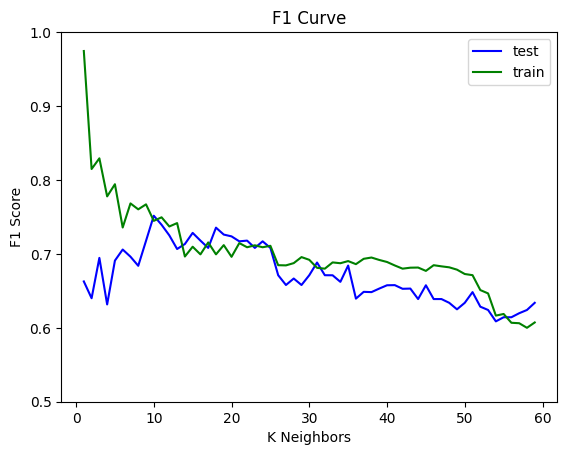

In [17]:
plt.plot(K, test_f1_scores, color = 'blue' , label = 'test')
plt.plot(K, train_f1_scores, color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.5, 1)
plt.legend()

<img src="Image 2 a.png" alt="Drawing" style="width: 600px;" style="height:800px;">

We can make some conclusions from the curve. 
- Between the values 0 and 10 our model is overfitting because while it performs good on the train set, it doesn't performs well on the test set.
- After the neighbours parameter 25, the model performance decreases badly. Thus it is underfitting. Neither at the test data nor at the train data the model doesn't perform well.